In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import ABIDEParser as Reader
# Get class labels
subject_IDs = Reader.get_ids()
labels = Reader.get_subject_score(subject_IDs, score='DX_GROUP')

# Get acquisition site
sites = Reader.get_subject_score(subject_IDs, score='SITE_ID')
unique = np.unique(list(sites.values())).tolist()

num_classes = 2
num_nodes = len(subject_IDs)

# Initialise variables for class labels and acquisition sites
y_data = np.zeros([num_nodes, num_classes])
y = np.zeros([num_nodes, 1])
site = np.zeros([num_nodes, 1], dtype=int)

# Get class labels and acquisition site for all subjects
for i in range(num_nodes):
    y_data[i, int(labels[subject_IDs[i]])-1] = 1
    y[i] = int(labels[subject_IDs[i]])
    site[i] = unique.index(sites[subject_IDs[i]])
features = Reader.get_networks(subject_IDs, kind='correlation', atlas_name='ho')
# x_train , x_test, y_train, y_test = train_test_split(features,y,train_size=0.8)
# from sklearn.utils.validation import column_or_1d
# y_train=column_or_1d(y_train, warn=True)


c:\PFA\population-gcn2\ABIDEParser.py:227: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in all_networks]


In [5]:
y2=y.flatten()
y2=y2-1

In [7]:
x_train , x_test, y_train, y_test = train_test_split(features,y2,train_size=0.8)

(111*111-111)/2=6105

In [8]:
x_train.shape

(696, 6105)

specificité et sensitivité
recall = TP/(TP+FN) = sensitivity = TPR <br/>
FPR = FP/(FP+TN) <br/>
specificity = 1 - FPR

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [11]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

c:\Users\ousem\.virtualenvs\population-gcn2-YZL6I4UQ\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
lr.score(x_test,y_test)

0.6742857142857143

In [13]:
y_pred_lr = lr.predict(x_test)

In [15]:
def sensitivity_specificity(confusion_ma):
  ss = {}
  ss['sensitivity']=confusion_ma[0,0]/(confusion_ma[0,0]+confusion_ma[0,1])
  fpr = confusion_ma[1,0]/(confusion_ma[1,0]+confusion_ma[1,1])
  ss['specificity']=1-fpr
  return ss

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

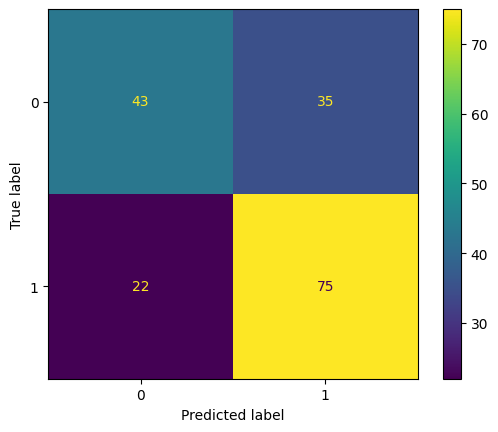

In [17]:
cm = confusion_matrix(y_test,y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [18]:
sensitivity_specificity(cm)

{'sensitivity': 0.5512820512820513, 'specificity': 0.7731958762886598}

propabilité de l'appartenance a la class 0 (!exited) et class 1(exited)

In [19]:
y_pred_proba_lr = lr.predict_proba(x_test)

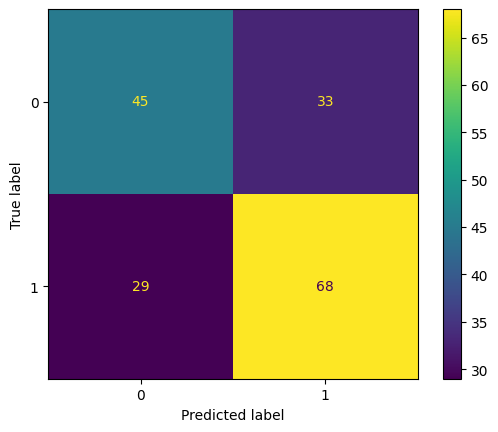

In [20]:
y_pred_with_threshold_lr = (y_pred_proba_lr[:,1] >= 0.6).astype(int)
cm = confusion_matrix(y_test,y_pred_with_threshold_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [108]:
from sklearn.metrics import roc_curve
import pandas as pd
from sklearn.metrics import roc_auc_score

In [24]:
fpr_lr, tpr_lr, th_lr = roc_curve(y_test,  y_pred_proba_lr[:,1])

In [190]:
out_data = pd.DataFrame()

In [191]:
out_data["fpr"]=fpr_lr
out_data["tpr"]=tpr_lr
out_data["roc_auc_score"]=roc_auc_score(y_test,  y_pred_proba_lr[:,1])
out_data["accuracy"]=lr.score(x_test,y_test)
out_data

,fpr,tpr,roc_auc_score,accuracy
0,0.000000,0.000000,0.710547,0.674286
1,0.000000,0.010309,0.710547,0.674286
2,0.000000,0.134021,0.710547,0.674286
3,0.025641,0.134021,0.710547,0.674286
4,0.025641,0.164948,0.710547,0.674286
...,...,...,...,...
75,0.910256,0.979381,0.710547,0.674286
76,0.910256,0.989691,0.710547,0.674286
77,0.974359,0.989691,0.710547,0.674286
78,0.974359,1.000000,0.710547,0.674286


In [192]:
out_data.to_csv("Logistic Regression.csv",index=False)

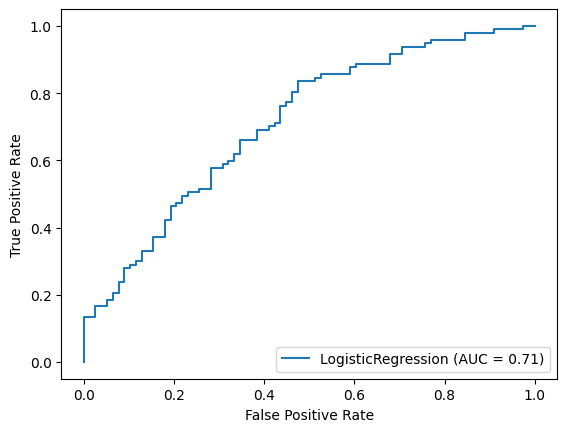

In [26]:
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

AUC calculer l'air au dessous du courbe

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [151]:
knn.score(x_test,y_test)

0.56

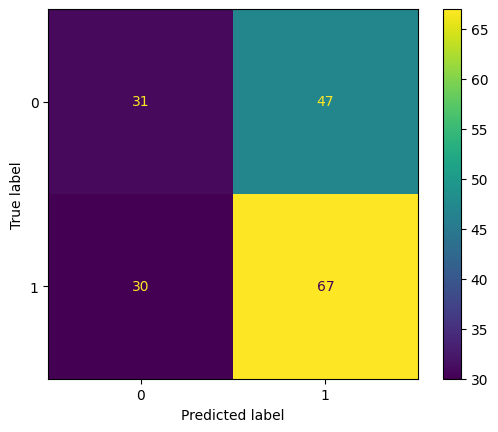

In [31]:
cm = confusion_matrix(y_test,y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [33]:
y_pred_proba_knn = knn.predict_proba(x_test)
fpr_knn, tpr_knn, th_knn = roc_curve(y_test,  y_pred_proba_knn[:,1])

In [142]:
fpr_knn

array([0.        , 0.12820513, 0.29487179, 0.6025641 , 0.8974359 ,
       0.98717949, 1.        ])

In [193]:
out_data = pd.DataFrame()
out_data["fpr"]=fpr_knn
out_data["tpr"]=tpr_knn
out_data["roc_auc_score"]=roc_auc_score(y_test,  y_pred_proba_knn[:,1])
out_data["accuracy"]=knn.score(x_test,y_test)
out_data.to_csv("K-Nearest Neighbors.csv",index=False)
out_data

,fpr,tpr,roc_auc_score,accuracy
0,0.000000,0.000000,0.527161,0.56
1,0.128205,0.072165,0.527161,0.56
2,0.294872,0.309278,0.527161,0.56
3,0.602564,0.690722,0.527161,0.56
4,0.897436,0.927835,0.527161,0.56
5,0.987179,0.979381,0.527161,0.56
6,1.000000,1.000000,0.527161,0.56


In [144]:
out_data.to_csv("knn.csv",index=False)

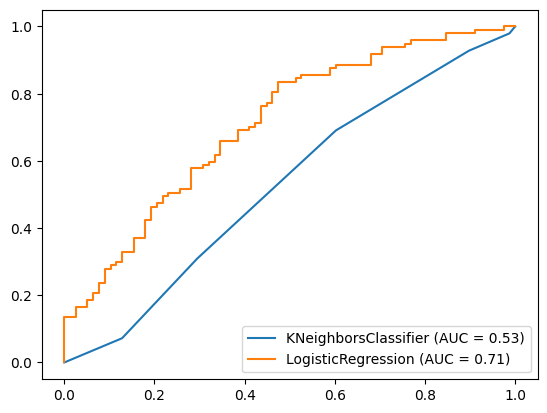

In [34]:
plt.plot(fpr_knn,tpr_knn,label=knn.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [119]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True,verbose=1)
grid_search=grid.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
{'n_neighbors': 19}
0.6149331963001028


In [126]:
knn_8 = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)
y_pred_proba_knn_8=knn_8.predict_proba(x_test)

In [127]:
knn_8.score(x_test,y_test)

0.56

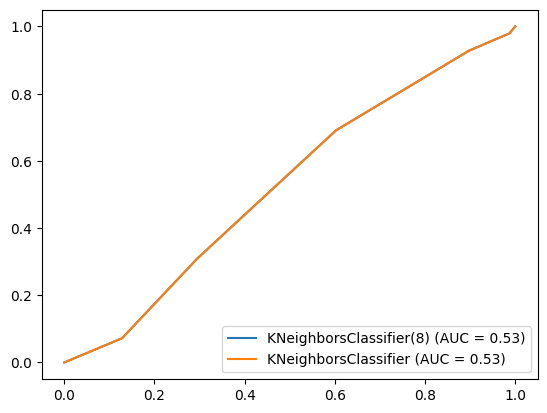

In [129]:

fpr_knn_8,tpr_knn_8,th_knn_8=roc_curve(y_test,y_pred_proba_knn_8[:,1])
plt.plot(fpr_knn_8,tpr_knn_8,label=knn_8.__class__.__name__+"(8) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_8[:,1]),2))+")")
plt.plot(fpr_knn,tpr_knn,label=knn.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

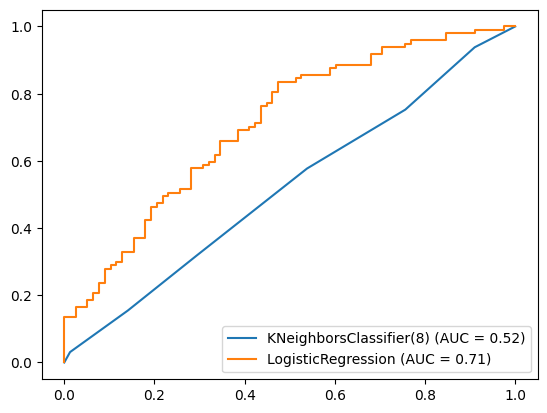

In [38]:
plt.plot(fpr_knn_8,tpr_knn_8,label=knn_8.__class__.__name__+"(8) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_8[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [39]:
from sklearn.svm import SVC

In [155]:
svc = SVC(kernel="linear",probability=True)
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)

In [156]:
svc.score(x_test,y_test)

0.6571428571428571

In [157]:
y_pred_proba_svc = svc.predict_proba(x_test)
fpr_svc, tpr_svc, th_svc = roc_curve(y_test,  y_pred_proba_svc[:,1])

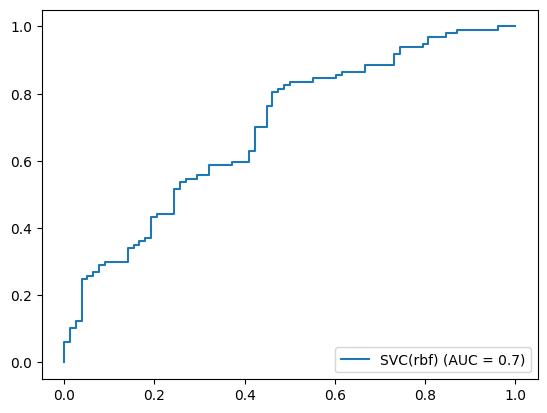

In [158]:
plt.plot(fpr_svc,tpr_svc,label=svc.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [194]:
out_data = pd.DataFrame()
out_data["fpr"]=fpr_svc
out_data["tpr"]=tpr_svc
out_data["roc_auc_score"]=roc_auc_score(y_test,  y_pred_proba_svc[:,1])
out_data["accuracy"]=svc.score(x_test,y_test)
out_data.to_csv("Support Vector Machine Linear.csv",index=False)
out_data

,fpr,tpr,roc_auc_score,accuracy
0,0.000000,0.000000,0.695612,0.657143
1,0.000000,0.010309,0.695612,0.657143
2,0.000000,0.061856,0.695612,0.657143
3,0.012821,0.061856,0.695612,0.657143
4,0.012821,0.103093,0.695612,0.657143
...,...,...,...,...
75,0.871795,0.979381,0.695612,0.657143
76,0.871795,0.989691,0.695612,0.657143
77,0.961538,0.989691,0.695612,0.657143
78,0.961538,1.000000,0.695612,0.657143


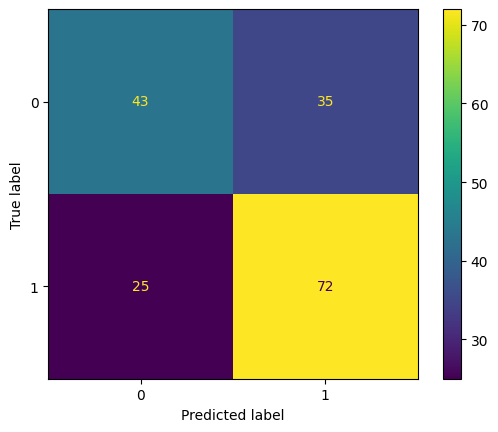

In [42]:
cm=confusion_matrix(y_test,y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [44]:
svc_rbf = SVC(kernel="rbf",probability=True)
svc_rbf.fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)

In [96]:
svc_rbf.score(x_test,y_test)

0.6742857142857143

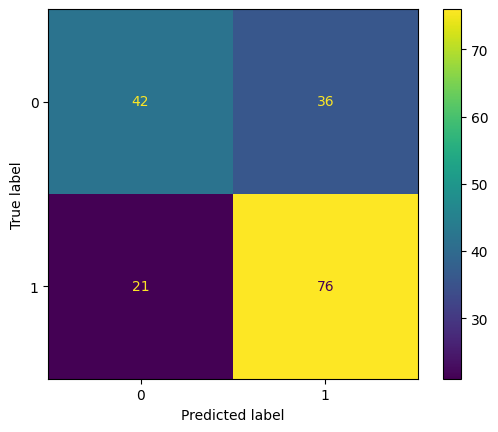

In [46]:
cm=confusion_matrix(y_test,y_pred_svc_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [48]:
y_pred_proba_svc_rbf = svc_rbf.predict_proba(x_test)
fpr_svc_rbf, tpr_svc_rbf, th_svc_rbf = roc_curve(y_test,  y_pred_proba_svc_rbf[:,1])

In [195]:
out_data = pd.DataFrame()
out_data["fpr"]=fpr_svc_rbf
out_data["tpr"]=tpr_svc_rbf
out_data["roc_auc_score"]=roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1])
out_data["accuracy"]=svc_rbf.score(x_test,y_test)
out_data.to_csv("Support Vector Machine RBF.csv",index=False)
out_data

,fpr,tpr,roc_auc_score,accuracy
0,0.000000,0.000000,0.727729,0.674286
1,0.000000,0.010309,0.727729,0.674286
2,0.000000,0.082474,0.727729,0.674286
3,0.012821,0.082474,0.727729,0.674286
4,0.012821,0.092784,0.727729,0.674286
...,...,...,...,...
71,0.743590,0.979381,0.727729,0.674286
72,0.794872,0.979381,0.727729,0.674286
73,0.794872,0.989691,0.727729,0.674286
74,1.000000,0.989691,0.727729,0.674286


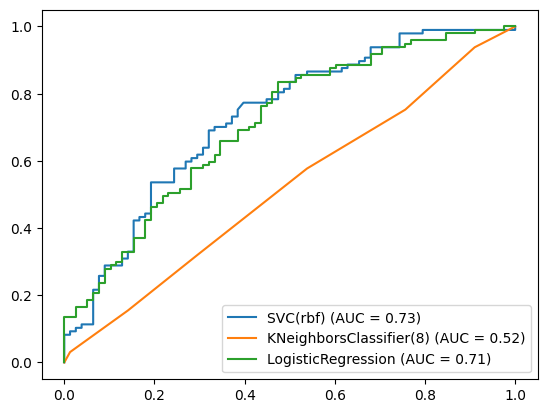

In [49]:
plt.plot(fpr_svc_rbf,tpr_svc_rbf,label=svc_rbf.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1]),2))+")")
plt.plot(fpr_knn_8,tpr_knn_8,label=knn_8.__class__.__name__+"(8) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_8[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)

In [174]:
dtc.score(x_test,y_test)

0.56

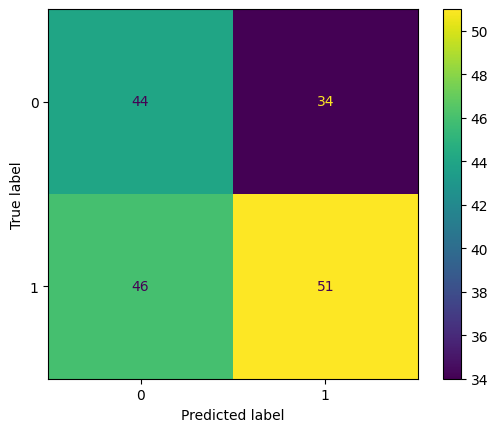

In [52]:
cm=confusion_matrix(y_test,y_pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [54]:
y_pred_proba_dtc = dtc.predict_proba(x_test)
fpr_dtc, tpr_dtc, th_dtc = roc_curve(y_test,  y_pred_proba_dtc[:,1])

In [188]:
out_data = pd.DataFrame()
out_data["fpr"]=fpr_dtc
out_data["tpr"]=tpr_dtc
out_data["roc_auc_score"]=roc_auc_score(y_test,  y_pred_proba_dtc[:,1])
out_data["accuracy"]=dtc.score(x_test,y_test)
out_data.to_csv("Decision Tree.csv",index=False)
out_data

,fpr,tpr,roc_auc_score,accuracy
0,0.000000,0.000000,0.578575,0.56
1,0.153846,0.175258,0.578575,0.56
2,0.166667,0.185567,0.578575,0.56
3,0.230769,0.257732,0.578575,0.56
4,0.269231,0.381443,0.578575,0.56
5,0.294872,0.443299,0.578575,0.56
6,0.410256,0.484536,0.578575,0.56
7,0.435897,0.525773,0.578575,0.56
8,0.576923,0.649485,0.578575,0.56
9,0.589744,0.721649,0.578575,0.56


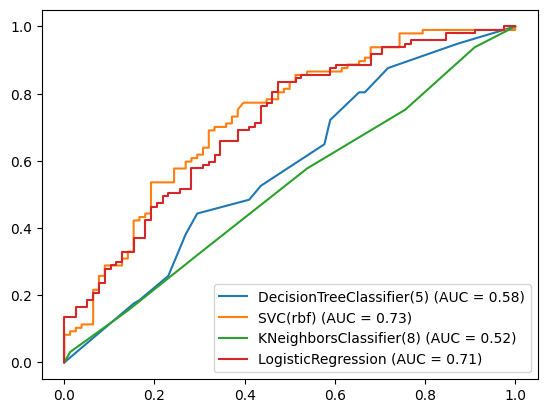

In [55]:
plt.plot(fpr_dtc,tpr_dtc,label=dtc.__class__.__name__+"(5) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_dtc[:,1]),2))+")")
plt.plot(fpr_svc_rbf,tpr_svc_rbf,label=svc_rbf.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1]),2))+")")
plt.plot(fpr_knn_8,tpr_knn_8,label=knn_8.__class__.__name__+"(8) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_8[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

Transformer le fichier dot generer par la methode export_graphviz ver un fichier pdf :
https://drive.google.com/file/d/1-zg_ulxCk9mmN3RzuipcA4qJK4RIescf/view?usp=sharing

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier(500)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

0.6514285714285715

In [98]:
rfc.score(x_test,y_test)

0.6514285714285715

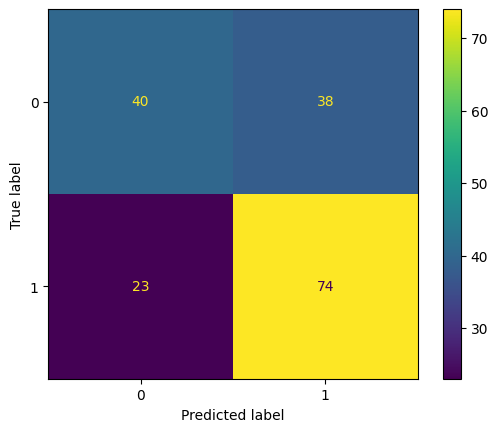

In [58]:
cm=confusion_matrix(y_test,y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [60]:
y_pred_proba_rfc = rfc.predict_proba(x_test)
fpr_rfc, tpr_rfc, th_rfc = roc_curve(y_test,  y_pred_proba_rfc[:,1])

In [196]:
out_data = pd.DataFrame()
out_data["fpr"]=fpr_rfc
out_data["tpr"]=tpr_rfc
out_data["roc_auc_score"]=roc_auc_score(y_test,  y_pred_proba_rfc[:,1])
out_data["accuracy"]=rfc.score(x_test,y_test)
out_data.to_csv("Random Forest.csv",index=False)
out_data

,fpr,tpr,roc_auc_score,accuracy
0,0.000000,0.000000,0.711538,0.651429
1,0.000000,0.010309,0.711538,0.651429
2,0.000000,0.030928,0.711538,0.651429
3,0.012821,0.041237,0.711538,0.651429
4,0.012821,0.072165,0.711538,0.651429
...,...,...,...,...
75,0.923077,0.979381,0.711538,0.651429
76,0.923077,1.000000,0.711538,0.651429
77,0.935897,1.000000,0.711538,0.651429
78,0.961538,1.000000,0.711538,0.651429


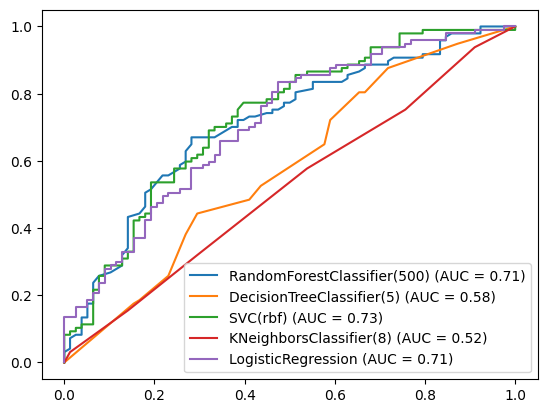

In [61]:
plt.plot(fpr_rfc,tpr_rfc,label=rfc.__class__.__name__+"(500) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_rfc[:,1]),2))+")")
plt.plot(fpr_dtc,tpr_dtc,label=dtc.__class__.__name__+"(5) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_dtc[:,1]),2))+")")
plt.plot(fpr_svc_rbf,tpr_svc_rbf,label=svc_rbf.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1]),2))+")")
plt.plot(fpr_knn_8,tpr_knn_8,label=knn_8.__class__.__name__+"(8) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_8[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

no roc curve

In [132]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)
accuracy_score(y_test,y_pred_ridge)

0.6571428571428571

In [99]:
ridge.score(x_test,y_test)

0.6571428571428571

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [136]:
y_pred_proba_gnb = gnb.predict_proba(x_test)

In [179]:
fpr_gnb,tpr_gnb,th_gnb=roc_curve(y_test,y_pred_proba_gnb[:,1])

In [207]:
out_data = pd.DataFrame()
out_data["fpr"]=fpr_gnb
out_data["tpr"]=tpr_gnb
out_data["roc_auc_score"]=roc_auc_score(y_test,  y_pred_proba_gnb[:,1])
out_data["accuracy"]=gnb.score(x_test,y_test)
out_data.to_csv("GaussienNB.csv",index=False)
out_data

,fpr,tpr,roc_auc_score,accuracy
0,0.000000,0.000000,0.680941,0.6
1,0.217949,0.381443,0.680941,0.6
2,0.217949,0.391753,0.680941,0.6
3,0.230769,0.402062,0.680941,0.6
4,0.230769,0.412371,0.680941,0.6
5,0.243590,0.412371,0.680941,0.6
6,0.243590,0.453608,0.680941,0.6
7,0.256410,0.453608,0.680941,0.6
8,0.256410,0.484536,0.680941,0.6
9,0.269231,0.484536,0.680941,0.6


In [202]:
out_data = pd.DataFrame()
out_data["fpr"]=fpr_gnb
out_data["tpr"]=tpr_gnb
out_data["roc_auc_score"]=roc_auc_score(y_test,  y_pred_proba_gnb[:,1])
out_data["accuracy"]=gnb.score(x_test,y_test)
out_data.to_csv("GaussienNB.csv",index=False)
out_data

,fpr,tpr,roc_auc_score,accuracy
0,0.000000,0.000000,0.680941,0.6
1,0.217949,0.381443,0.680941,0.6
2,0.217949,0.391753,0.680941,0.6
3,0.230769,0.402062,0.680941,0.6
4,0.230769,0.412371,0.680941,0.6
5,0.243590,0.412371,0.680941,0.6
6,0.243590,0.453608,0.680941,0.6
7,0.256410,0.453608,0.680941,0.6
8,0.256410,0.484536,0.680941,0.6
9,0.269231,0.484536,0.680941,0.6


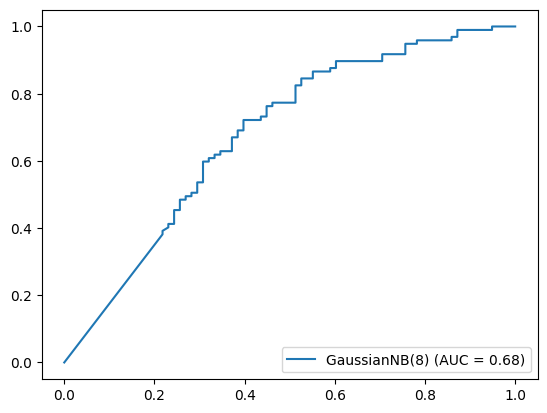

In [138]:
plt.plot(fpr_gnb,tpr_gnb,label=gnb.__class__.__name__+"(8) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_gnb[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [64]:
accuracy_score(y_test,y_pred)

0.6

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(x_train, y_train).predict(x_test)

In [106]:
lda.score(x_test,y_test)

0.68

In [139]:
y_pred_proba_lda = lda.predict_proba(x_test)

In [181]:
fpr_lda,tpr_lda,th_lda=roc_curve(y_test,y_pred_proba_lda[:,1])

In [198]:
out_data = pd.DataFrame()
out_data["fpr"]=fpr_lda
out_data["tpr"]=tpr_lda
out_data["roc_auc_score"]=roc_auc_score(y_test,  y_pred_proba_lda[:,1])
out_data["accuracy"]=lda.score(x_test,y_test)
out_data.to_csv("Linear Discriminant Analysis.csv",index=False)
out_data

,fpr,tpr,roc_auc_score,accuracy
0,0.000000,0.000000,0.704996,0.68
1,0.000000,0.010309,0.704996,0.68
2,0.000000,0.113402,0.704996,0.68
3,0.025641,0.113402,0.704996,0.68
4,0.025641,0.154639,0.704996,0.68
...,...,...,...,...
76,0.935897,0.979381,0.704996,0.68
77,0.974359,0.979381,0.704996,0.68
78,0.974359,0.989691,0.704996,0.68
79,1.000000,0.989691,0.704996,0.68


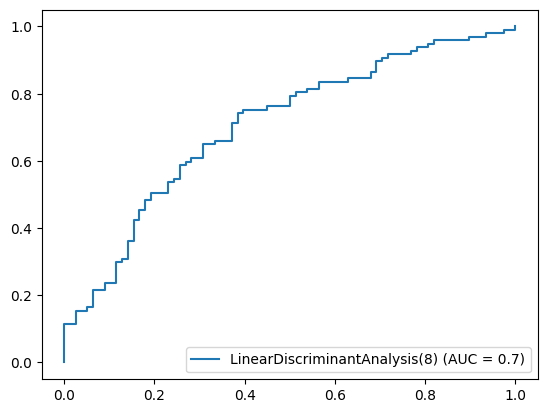

In [140]:
fpr_lda,tpr_lda,th_lda=roc_curve(y_test,y_pred_proba_lda[:,1])
plt.plot(fpr_lda,tpr_lda,label=lda.__class__.__name__+"(8) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lda[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()